<a href="https://colab.research.google.com/github/Amrutha123BS/Appliances-Energy-Prediction/blob/main/V2_Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description

Data-driven prediction of energy use of appliances
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

Date time year-month-day hour:minute:

Appliances, energy use in Wh (Dependent variable)

T1, Temperature in kitchen area, in Celsius

RH1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in

RH7, Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius

RH8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station),

in Celsius Pressure (from Chievres weather station), in mm Hg

RHout, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station),

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

# Data Exploration

In [61]:
# Let us begin with importing the libraries

import pandas as pd # linear algebra
import numpy as np # data processing
import matplotlib.pyplot as plt # data processing
import seaborn as sns  # visualization tool

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
aep_df = pd.read_csv("/content/drive/MyDrive/Almabetter/CAPSTONE-REGRESSION-SUP-2/data_application_energy.csv")

In [19]:
aep_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [20]:
aep_df.shape

(19735, 29)

In [21]:
aep_df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [22]:
aep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

No NaN Values Found.

In [23]:
# Duplicates Check

aep_df.duplicated().sum()

0

No Duplicates Found

In [27]:
# In the statement, we are asked to drop the columns lights, energy use of light fixtures in the house in Wh (Drop this column)

aep_df.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

Max Values are 0 hence dropping it is worth.

In [28]:
aep_df.drop(['lights'], axis = 1, inplace = True)

In [29]:
# rv1 and rv2 are random variables hence drop 

aep_df.drop(['rv1'], axis = 1, inplace = True)
aep_df.drop(['rv2'], axis = 1, inplace = True)

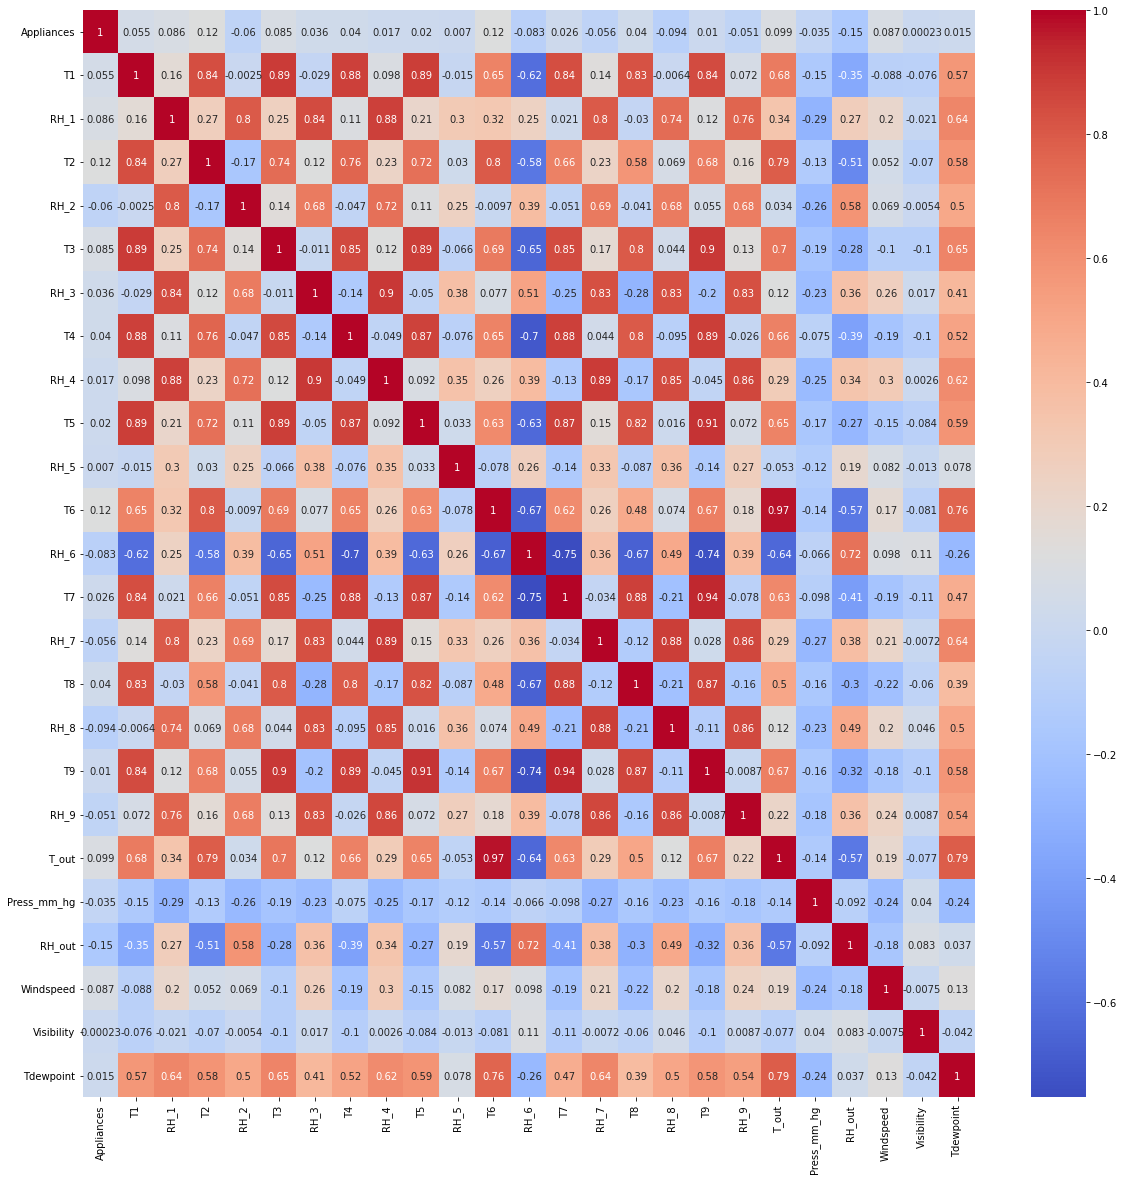

In [30]:
#Bivariate Analysis: Corelation Matrix
fig, ax = plt.subplots(figsize = ( 20 , 20 ))
correlation = aep_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [46]:
aep_df.columns

Index(['date', 'Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint'],
      dtype='object')

In [47]:
temp_dict = {
    'T1' : 'temp_kitchen', 'T2' : 'temp_living', 'T3' : 'temp_laundry', 
    'T4' : 'temp_office', 'T5' : 'temp_bath', 'T6' : 'temp_outside',
    'T7' : 'temp_iron', 'T8' : 'temp_teen', 'T9' : 'temp_parents', 'T_out' : 'temp_station'
}

In [48]:
humid_dict = {
    'RH_1' : 'humid_kitchen', 'RH_2' : 'humid_living', 'RH_3' : 'humid_laundry', 
    'RH_4' : 'humid_office', 'RH_5' : 'humid_bath', 'RH_6' : 'humid_outside',
    'RH_7' : 'humid_iron', 'RH_8' : 'humid_teen', 'RH_9' : 'humid_parents', 'RH_out' : 'humid_station'
}

In [60]:
weather_cols = ['Tdewpoint', 'Press_mm_hg', 'Visibility', 'date', 'Windspeed']

In [49]:
energy_df = aep_df.rename(columns=temp_dict)
energy_df = energy_df.rename(columns=humid_dict)

In [57]:
energy_df.columns

Index(['date', 'Appliances', 'temp_kitchen', 'humid_kitchen', 'temp_living',
       'humid_living', 'temp_laundry', 'humid_laundry', 'temp_office',
       'humid_office', 'temp_bath', 'humid_bath', 'temp_outside',
       'humid_outside', 'temp_iron', 'humid_iron', 'temp_teen', 'humid_teen',
       'temp_parents', 'humid_parents', 'temp_station', 'Press_mm_hg',
       'humid_station', 'Windspeed', 'Visibility', 'Tdewpoint'],
      dtype='object')

# OUTLIERS CHECK

In [92]:
energy_temp_df = energy_df[list(temp_dict.values())]
energy_humid_df = energy_df[list(humid_dict.values())]
energy_weather_df = energy_df[weather_cols]

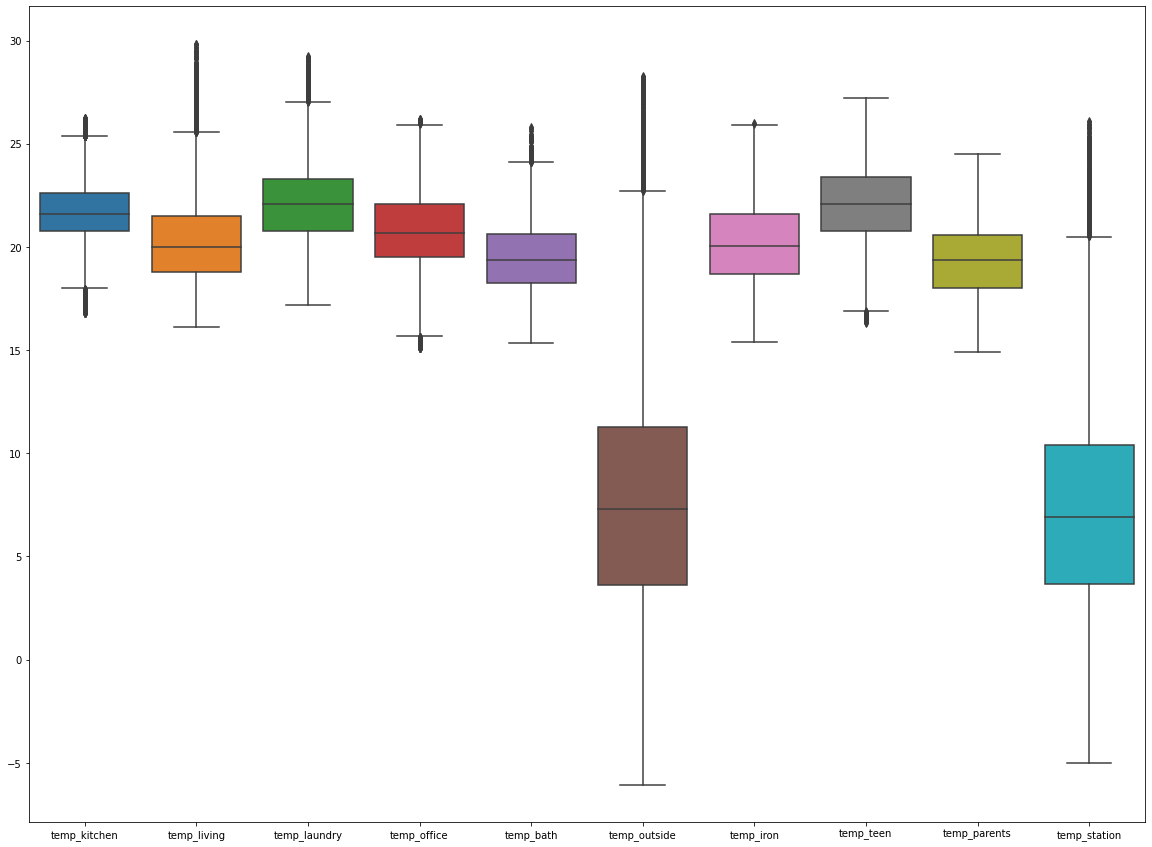

In [88]:
# OUTLIERS CHECK IN THE TEMPERATURE ATTRIBUTES

plt.figure(figsize=(20,15), facecolor='w')
sns.boxplot(data= energy_temp_df)
plt.show()

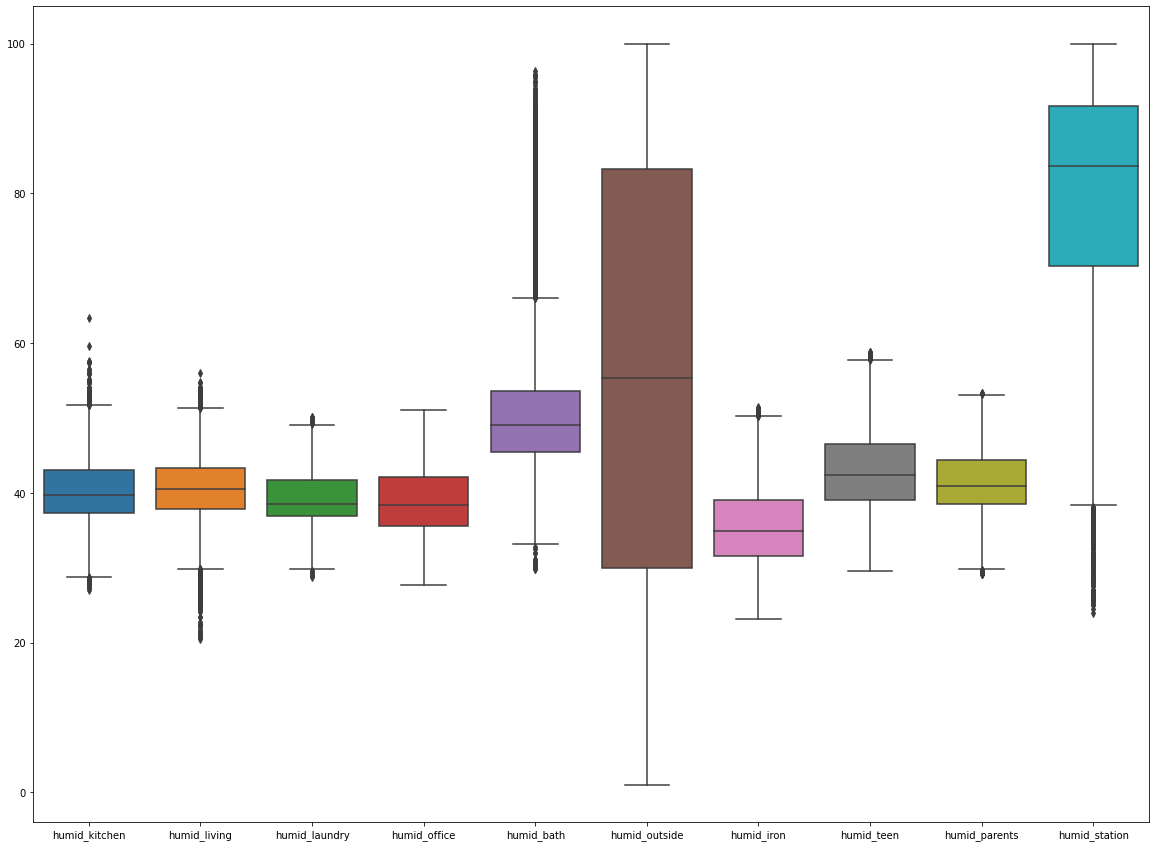

In [93]:
# OUTLIERS CHECK IN THE Humid ATTRIBUTES

plt.figure(figsize=(20,15), facecolor='w')
sns.boxplot(data= energy_humid_df)
plt.show()

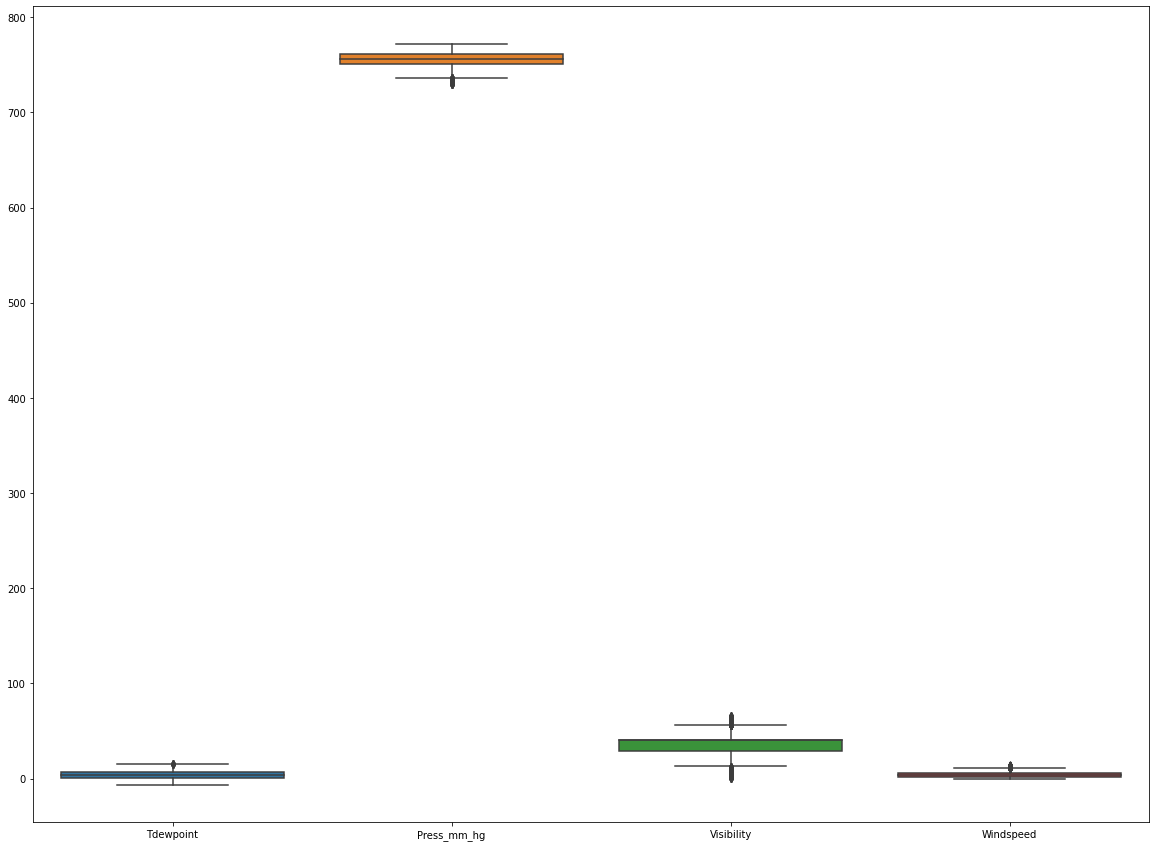

In [99]:
# OUTLIERS CHECK IN THE Weather ATTRIBUTES

plt.figure(figsize=(20,15), facecolor='w')
sns.boxplot(data= energy_weather_df)
plt.show()

In [58]:
energy_df[temp_dict.values()].describe()

,temp_kitchen,temp_living,temp_laundry,temp_office,temp_bath,temp_outside,temp_iron,temp_teen,temp_parents,temp_station
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828,7.411665
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712,5.317409
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,-5.000000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000,3.666667
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000,6.916667
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000,10.408333
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,26.100000


Inference: 

1. Average outside temperature over a period of 4.5 months is around 7.5 degrees. It ranges from -6 - 28 degrees.

2. While average temperature inside the building has been around 20 degrees for all the rooms. It ranges from 14 - 30 degrees 

3. Which implies, Warming appliances have been used to keep the insides of the building warm. There must be some sort of direct correlation between temperature and consumption of energy inside house.

In [59]:
energy_df[humid_dict.values()].describe()

,humid_kitchen,humid_living,humid_laundry,humid_office,humid_bath,humid_outside,humid_iron,humid_teen,humid_parents,humid_station
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401,79.750418
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497,14.901088
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,24.000000
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000,70.333333
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000,83.666667
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095,91.666667
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,100.000000


Inference:


1. Average humidity outside the building has been higher than the average humidity inside.

2. Average humidity at the weather station is significantly higher compared to outside humidity near the building.

3. Average humidity in the bathroom is significantly higher compared to other rooms due to obvious reasons.

4. Kids and parent room show a comparatively higher average humidity as well signifying the fact that, inhabitants of this building spend most of their time in these buildings.

In [100]:
energy_weather_df.describe()

,Tdewpoint,Press_mm_hg,Visibility,Windspeed
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,3.760707,755.522602,38.330834,4.039752
std,4.194648,7.399441,11.794719,2.451221
min,-6.600000,729.300000,1.000000,0.000000
25%,0.900000,750.933333,29.000000,2.000000
50%,3.433333,756.100000,40.000000,3.666667
75%,6.566667,760.933333,40.000000,5.500000
max,15.500000,772.300000,66.000000,14.000000
